In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import tree
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = arff.loadarff("dataset/arrhythmia.arff")
df = pd.DataFrame(df[0])
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,b'0',190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,b'N'
1,56.0,b'1',165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,b'N'
2,54.0,b'0',172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,b'N'
3,55.0,b'0',175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,b'P'
4,75.0,b'0',190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,b'1',160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,b'P'
448,37.0,b'0',190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,b'N'
449,36.0,b'0',166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,b'N'
450,32.0,b'1',155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,b'P'


#### Converte coluna binaria

In [3]:
df["binaryClass"] = df["binaryClass"].str.decode('utf-8') 
df["sex"] = pd.to_numeric(df["sex"].str.decode('utf-8'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to binaryClass
dtypes: float64(206), int64(1), object(73)
memory usage: 988.9+ KB


In [5]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)

,0
J,376
P,22
T,8
QRST,1
heartrate,1
chAVR_SwaveAmp,0
chAVR_RwaveAmp,0
chAVR_QwaveAmp,0
chAVR_JJwaveAmp,0
chDIII_QRSTA,0


In [6]:
df.drop("J",axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

In [7]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False).head(10)

,0
age,0
chDIII_PwaveAmp,0
chAVR_RwaveAmp,0
chAVR_QwaveAmp,0
chAVR_JJwaveAmp,0
chDIII_QRSTA,0
chDIII_QRSA,0
chDIII_TwaveAmp,0
chDIII_SPwaveAmp,0
chDII_TwaveAmp,0


In [8]:
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,N
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,N
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,N
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,P
5,13.0,0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,P
448,37.0,0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,N
449,36.0,0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,N
450,32.0,1,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,P


### Distribuição das Classes

P    237
N    183
Name: binaryClass, dtype: int64


<AxesSubplot:title={'center':'Count (binaryClass)'}>

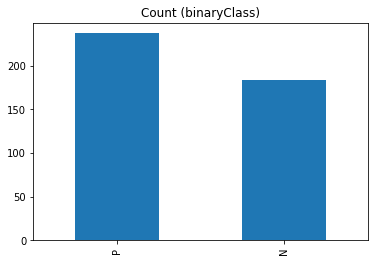

In [9]:
df_count_target = df['binaryClass'].value_counts()
# df_count_target

print(df_count_target)
df_count_target.plot(kind='bar', title='Count (binaryClass)')

### Normalizar

In [10]:
df['binaryClass'].replace(["N", "P"],[0,1], inplace=True)
df.shape

(420, 279)

In [11]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,binaryClass
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.233333,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.0,0.53125,0.741667,0.507519,0.569579,0.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.140741,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.0,0.31250,0.675000,0.485714,0.500971,0.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.274074,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.0,0.34375,0.783333,0.424812,0.566990,0.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.251852,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.0,0.37500,0.716667,0.592481,0.648544,1.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.233333,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.0,0.53125,0.683333,0.433835,0.451133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.159259,0.570732,0.395894,...,1.000000,0.182203,0.825175,0.0,0.0,0.46875,0.550000,0.299248,0.246602,1.0
416,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.333333,0.356098,0.756598,...,1.000000,0.661017,0.944056,0.0,0.0,0.37500,0.700000,0.618045,0.653722,0.0
417,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.307407,0.565854,0.255132,...,1.000000,0.690678,0.000000,0.0,0.0,0.71875,0.583333,0.000000,0.034951,0.0
418,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.396296,0.307317,0.662757,...,0.902439,0.508475,0.975524,0.0,0.0,0.40625,0.700000,0.520301,0.551456,1.0


### Oversample + Tomeke

<AxesSubplot:title={'center':'Count (binaryClass)'}>

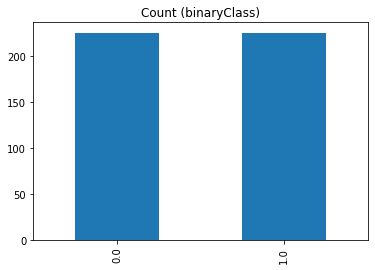

In [12]:
X_train = df.drop(['binaryClass'],axis=1)
y_train = df['binaryClass']

smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)
y_train_smtom.value_counts().plot(kind='bar', title='Count (binaryClass)')

## Funções

In [13]:
def func_acuracy_grid_search(df, classe, metodo, param_grid ):
    

    # Normalizar
    scaler = MinMaxScaler()
    df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


    # Train test
    X_train = df_normalizado.drop([classe],axis=1)
    y_train = df_normalizado[classe]

    # Resample SMOTE + Tomek
    smtom = SMOTETomek(random_state=139)
    X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)
    # y_train_smtom.value_counts().plot(kind='bar', title='Count (binaryClass)')

    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(X_train_smtom, y_train_smtom, test_size=0.1, random_state=42)


    # metodo = KNeighborsClassifier()
    # range = list(range(1, 51))
    # param_grid = dict(n_neighbors=k_range)

    model = GridSearchCV(metodo, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # accuracy = accuracy_score(y_test, y_pred)
    # print("Accuracy: %.2f%%" % (accuracy * 100.0))

    estimador = model.best_estimator_
    acuracia = cross_val_score(estimador, x_train, y_train, cv = 10, scoring = 'accuracy') 

    return acuracia, y_test, y_pred

def matrix_confusao(yTeste,yPred):
   conf_mat = confusion_matrix(y_true=yTeste, y_pred=yPred)
   print('Confusion matrix:\n', conf_mat)

   labels = ['Class 0', 'Class 1']
   fig = plt.figure()
   ax = fig.add_subplot(111)
   cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
   fig.colorbar(cax)
   ax.set_xticklabels([''] + labels)
   ax.set_yticklabels([''] + labels)
   plt.xlabel('Predicted')
   plt.ylabel('Expected')
   plt.show()

# KNN

In [15]:
# Parametros
param_grid = {'n_neighbors':np.arange(1,10), 'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute'),'p':[1,2], 'leaf_size':np.arange(1,10)}

cls = KNeighborsClassifier()
acuracia_knn_arrhythmia, y_test, y_pred = func_acuracy_grid_search(df, 'binaryClass',cls, param_grid)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


In [50]:
print("Acurácia = " + str(acuracia_arrhythmia.mean()))

Acurácia = 0.7754878048780489


# Arvore de decisão

In [73]:
# Parametros
param_grid = {'max_leaf_nodes':(np.arange(1,10),None),'max_features':(np.arange(1,10),'auto','sqrt','log2',None),'min_samples_split':(np.arange(1,10)),'max_depth':(np.arange(1,10),None),'criterion':('gini','entropy','log_loss'),'splitter':('best','random')}

cls = tree.DecisionTreeClassifier()
acuracia_tree_arrhythmia, y_test, y_pred = func_acuracy_grid_search(df, 'binaryClass',cls, param_grid)
acuracia_tree_arrhythmia.mean()

Fitting 10 folds for each of 4860 candidates, totalling 48600 fits


/home/marcos/DRIVE/ESTUDOS/UNIOESTE/ICD/Projeto/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
38360 fits failed out of a total of 48600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcos/DRIVE/ESTUDOS/UNIOESTE/ICD/Projeto/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcos/DRIVE/ESTUDOS/UNIOESTE/ICD/Projeto/env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/marcos/DRIVE/ESTUDOS/UNIOESTE/ICD/Projeto/env/lib/python3.10/s

0.7382317073170732

In [55]:
acuracia_tree_arrhythmia.mean()

0.7532926829268293